In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [3]:
values = pd.read_csv('../csv/train_values.csv')
values.head().T

,0,1,2,3,4
building_id,802906,28830,94947,590882,201944
geo_level_1_id,6,8,21,22,11
geo_level_2_id,487,900,363,418,131
geo_level_3_id,12198,2812,8973,10694,1488
count_floors_pre_eq,2,2,2,2,3
age,30,10,10,10,30
area_percentage,6,8,5,6,8
height_percentage,5,7,5,5,9
land_surface_condition,t,o,t,t,t
foundation_type,r,r,r,r,r


In [4]:
merged = values.merge(labels, on="building_id")
values_to_use = pd.DataFrame()
values_to_use['count_families'] = merged['count_families']
values_to_use['damage_grades'] = merged['damage_grade']
values_to_use

,count_families,damage_grades
0,1,3
1,1,2
2,1,3
3,1,2
4,1,3
...,...,...
260596,1,2
260597,1,3
260598,1,3
260599,1,2


In [5]:
gb_values_to_use = values_to_use.groupby('damage_grades').agg({'count_families':'sum'})
gb_values_to_use.rename(columns={'count_families': '% de familias afectadas por grado de destruccion'})

,% de familias afectadas por grado de destruccion
damage_grades,
1,22991
2,145593
3,87834


array([<AxesSubplot:ylabel='count_families'>], dtype=object)

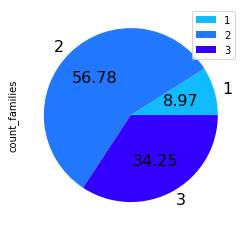

In [6]:
gb_values_to_use.plot(subplots=True,kind='pie',autopct="%.2f",\
                      textprops={'fontsize': 16},\
                      colors = ["#11bbff", "#2277ff", "#3300ff"])

In [7]:
estructs = merged.filter(like='has_superstructure')
estructs

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,0,1,0,0,0,0,0,0,0,0,0
260597,0,1,0,0,0,0,0,0,0,0,0
260598,0,1,0,0,0,0,0,0,0,0,0
260599,0,0,0,0,0,1,0,0,0,0,0
